In [1]:
__author__ = "@Tssp"
__date__ = "21/09/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18

In [2]:
delta = np.loadtxt('Simulations/q1d/delta_asc_ix6603.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/q1d/delta_asc_ix6603.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky = 2*np.pi/lambd
Iy = 4993 * (1e4 / Eh * to * ao**2)
Vy = alpha * Iy # a.u
Iy = Vy/alpha
wy = np.sqrt( 2 * Vy * ky**2 / mass)       
dho = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
np.sqrt(6604/4993)

1.1500659600202747

In [5]:
folder_path = "Simulations/q1d/ix6604_iy4993_iz50/config/"

In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix6604_iy4993_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm200_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.70855', '.70860', '.71030', '.71035', '.71040', '.71045', '.71050', '.71055', '.71075', '.71080', '.71085', '.71090', '.71095', '.71160', '.71200'] non readed


In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

Least bound state:  1001 -0.19941182227646856
First trap state:  1002 0.003344750359964451


In [10]:
for key in dic.keys():
    dic[key] = np.sort(dic[key])

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b*')
ax.set_ylim(0, 3)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
fig.savefig('PRL_Sala_Results/Figures/Ix6604_Iy4993_Iz50_Easc.png', dpi=200)
plt.show()

# Crosses

In [105]:
%matplotlib inline

1007
1008
1009
1010


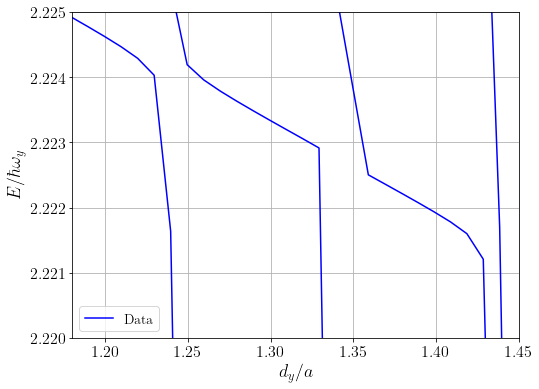

In [11]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos + 6, least_bound_pos + 10):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.22, 2.225)
ax2.set_xlim(1.18, 1.45)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
plt.show()

In [12]:
%matplotlib

Using matplotlib backend: MacOSX


In [13]:
fig2, ax2 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos + 4, least_bound_pos + 10):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.22, 2.225)
ax2.set_xlim(1.18, 1.45)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 40:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [14]:
fig3, ax3 = plt.subplots(figsize=(8,5))
# nivel 1007:
f1007 = np.polyfit(xcoord, ycoord, deg=1)
x1007 = np.linspace(1.15, 1.45, num=40)
ax3.plot(x1007, np.polyval(f1007, x1007), 'ro', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1007']/wy, 'b', label='Adiabatic')

# nivel 1008:
f1008 = np.polyfit(x[(x > 1.1) & (x < 1.225)], np.array(dic['nivel_1008'])[(x > 1.1) & (x < 1.225)]/wy, deg=1)
x1008 = np.linspace(1.21, 1.25, num=100)
ax3.plot(x1008, np.polyval(f1008, x1008), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1008']/wy, 'b')

# nivel 1009:
f1009 = np.polyfit(x[(x > 1.21) & (x < 1.36)], np.array(dic['nivel_1009'])[(x > 1.21) & (x < 1.36)]/wy, deg=1)
x1009 = np.linspace(1.32, 1.37, num=100)
ax3.plot(x1009, np.polyval(f1009, x1009), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x > 1.40) & (x < 1.45)], np.array(dic['nivel_1010'])[(x > 1.40) & (x < 1.45)]/wy, deg=1)
x1010 = np.linspace(1.32, 1.45, num=100)
ax3.plot(x1010, np.polyval(f1010, x1010), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1007, f1008), np.polyval(f1007, cross_points(f1007, f1008)), 'k*', markersize=10, label="ICIR")
ax3.plot(cross_points(f1007, f1009), np.polyval(f1007, cross_points(f1007, f1009)), 'k*', markersize=10)
ax3.plot(cross_points(f1007, f1010), np.polyval(f1007, cross_points(f1007, f1010)), 'k*', markersize=10)

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(2.22, 2.225)
ax3.set_xlim(1.18, 1.45)
plt.tight_layout()
fig3.savefig('PRL_Sala_Results/Figures/Ix6604_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [108]:
print(f'''Crosses between (x, E):
* 1007-1008: ({cross_points(f1007, f1008)}, {np.polyval(f1007, cross_points(f1007, f1008))})
* 1007-1009: ({cross_points(f1007, f1009)}, {np.polyval(f1007, cross_points(f1007, f1009))})
* 1007-1010: ({cross_points(f1007, f1010)}, {np.polyval(f1007, cross_points(f1007, f1010))})''')

Crosses between (x, E):
* 1007-1008: (1.240533584195364, 2.2240736569368496)
* 1007-1009: (1.3404819126093988, 2.222729959460301)
* 1007-1010: (1.437189311409866, 2.221429832786912)


In [109]:
print(f"ICIR: asc/dy = {1/cross_points(f1007, f1008)} and {1/cross_points(f1007, f1010)}")

ICIR: asc/dy = 0.8061047381064019 and 0.6958025585502106


In [110]:
np.savetxt('PRL_Sala_Results/ICIR_positions_6604_4993_50.txt', 
           [[1.15, 1.15], [1/cross_points(f1007, f1008), 1/cross_points(f1007, f1010)], 
            [np.polyval(f1007, cross_points(f1007, f1008)), np.polyval(f1007, cross_points(f1007, f1010))]], 
           header='wx/wy, asc/dy, E/hwy')